# Preprocesamiento Básico de Datos para su mitigación de sesgo.

## Descripción
El dataset "Statlog (German Credit Data)" es un conjunto de datos ampliamente utilizado en la comunidad de machine learning para la evaluación de modelos de crédito. Contiene información sobre 1000 solicitudes de crédito, donde cada instancia tiene varios atributos asociados.


El dataset es conocido por su utilidad en la evaluación de modelos de crédito. Sus características incluyen:
- Variedad de tipos de variables: numéricas y categóricas.
- Tamaño razonable de muestra: 1000 instancias.
- Variable objetivo binaria: fácilmente interpretable como aprobación o denegación de crédito.
- Utilidad práctica: aplicable en situaciones reales de toma de decisiones crediticias.

El objetivo de este notebook es realizar un preprocesamiento básico de los datos para mitigar el sesgo en el dataset. El sesgo en los datos puede surgir de varias fuentes, como la falta de representación de ciertos grupos, la presencia de valores atípicos o la presencia de valores faltantes. 

## Variables
El dataset contiene las siguientes variables:

1. **Status of existing checking account**: Estado de la cuenta corriente existente (categórica: ninguno, < 0 DM, 0 - 200 DM, > 200 DM).
2. **Duration in month**: Duración en meses del crédito (numérica).
3. **Credit history**: Historial crediticio del solicitante (categórica: crítico/otros créditos existentes en este banco, existente y pagado, atrasos pasados, pago retrasado/no existente).
4. **Purpose**: Propósito del crédito (categórica: automóvil, muebles/electrodomésticos, radio/TV, educación, reparaciones, vacaciones/otros).
5. **Credit amount**: Monto del crédito solicitado (numérica).
6. **Savings account/bonds**: Cantidad de ahorros o bonos del solicitante (categórica: desconocido/ninguno, < 100 DM, 100 - 500 DM, 500 - 1000 DM, > 1000 DM).
7. **Present employment since**: Tiempo en el empleo actual del solicitante (categórica: < 1 año, 1 - 4 años, 4 - 7 años, > 7 años).
8. **Installment rate in percentage of disposable income**: Tasa de la cuota en porcentaje del ingreso disponible (numérica).
9. **Personal status and sex**: Estado personal y sexo del solicitante (categórica: masculino soltero, femenino/divorciado/viudo, masculino casado/viudo).
10. **Other debtors / guarantors**: Otros deudores o garantes (categórica: ninguno, co-solicitante, garante).
11. **Present residence since**: Tiempo de residencia actual en años (numérica).
12. **Property**: Propiedad del solicitante (categórica: bienes raíces, seguro, coche/otros).
13. **Age in years**: Edad del solicitante en años (numérica).
14. **Other installment plans**: Otros planes de cuotas (categórica: banco, tienda, ninguno).
15. **Housing**: Tipo de vivienda del solicitante (categórica: alquiler, propio, gratis).
16. **Number of existing credits at this bank**: Número de créditos existentes en este banco (numérica).
17. **Job**: Tipo de trabajo del solicitante (categórica: no calificado/no residente, no calificado/residente, calificado, altamente calificado).
18. **Number of people being liable to provide maintenance for**: Número de personas responsables de proporcionar mantenimiento (numérica).
19. **Telephone**: Presencia de teléfono (categórica: sí, no).
20. **Foreign worker**: Trabajador extranjero (categórica: sí, no).
21. **Class**: Variable objetivo binaria indicando si la solicitud de crédito fue aprobada (1) o denegada (2).





#### Lectura de los datos

In [3]:
from Preprocesamiento import plots, utils

data = utils.load_data("../data/Statlog.csv")

#### Información de los datos

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing checking account                       1000 non-null   object
 1   Duration in month                                         1000 non-null   int64 
 2   Credit history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit amount                                             1000 non-null   int64 
 5   Savings account/bonds                                     1000 non-null   object
 6   Present employment since                                  1000 non-null   object
 7   Installment rate in percentage of disposable income       1000 non-null   int64 
 8   Personal status and sex      

#### Obtención de los valores nulos

In [5]:
utils.get_missing_values(data)

No missing values found


#### Cambio de los valores categóricos por valores comprensibles según documentación

In [6]:
# cambio de los categoricos para poder trabajar con ellos
data = utils.replace_categorical_values(data)
data.head().T

,0,1,2,3,4
Status of existing checking account,< 0 DM,0 - 200 DM,no checking account,< 0 DM,< 0 DM
Duration in month,6,48,12,42,24
Credit history,critical account,existing credits paid,critical account,existing credits paid,delay in paying
Purpose,radio/television,radio/television,education,furniture/equipment,car (new)
Credit amount,1169,5951,2096,7882,4870
Savings account/bonds,unknown/no savings,< 100 DM,< 100 DM,< 100 DM,< 100 DM
Present employment since,>= 7 years,1 - 4 years,4 - 7 years,4 - 7 years,1 - 4 years
Installment rate in percentage of disposable income,4,2,2,2,3
Personal status and sex,male: single,female: divorced/separated/married,male: single,male: single,male: single
Other debtors / guarantors,none,none,none,guarantor,none


#### Personal status and sex
Se puede ver cómo este atributo podría ser separado en dos atributos diferentes, uno para el estado civil y otro para el sexo.

In [7]:
data = utils.split_personal_status_and_sex(data)
data.head().T

,0,1,2,3,4
Class,1,2,1,1,2
Status of existing checking account,< 0 DM,0 - 200 DM,no checking account,< 0 DM,< 0 DM
Duration in month,6,48,12,42,24
Credit history,critical account,existing credits paid,critical account,existing credits paid,delay in paying
Purpose,radio/television,radio/television,education,furniture/equipment,car (new)
Credit amount,1169,5951,2096,7882,4870
Savings account/bonds,unknown/no savings,< 100 DM,< 100 DM,< 100 DM,< 100 DM
Present employment since,>= 7 years,1 - 4 years,4 - 7 years,4 - 7 years,1 - 4 years
Installment rate in percentage of disposable income,4,2,2,2,3
Other debtors / guarantors,none,none,none,guarantor,none


## Rangos Normales
Los rangos normales varían según la variable, pero en general, por ejemplo:
- **Duration in month**: 6 - 72 meses.
- **Credit amount**: Varios miles de euros.
- **Age in years**: 18 - 75 años.
- **Present residence since**: 1 - 7 años de residencia.
- **Number of existing credits at this bank**: 1 - 4 créditos existentes.

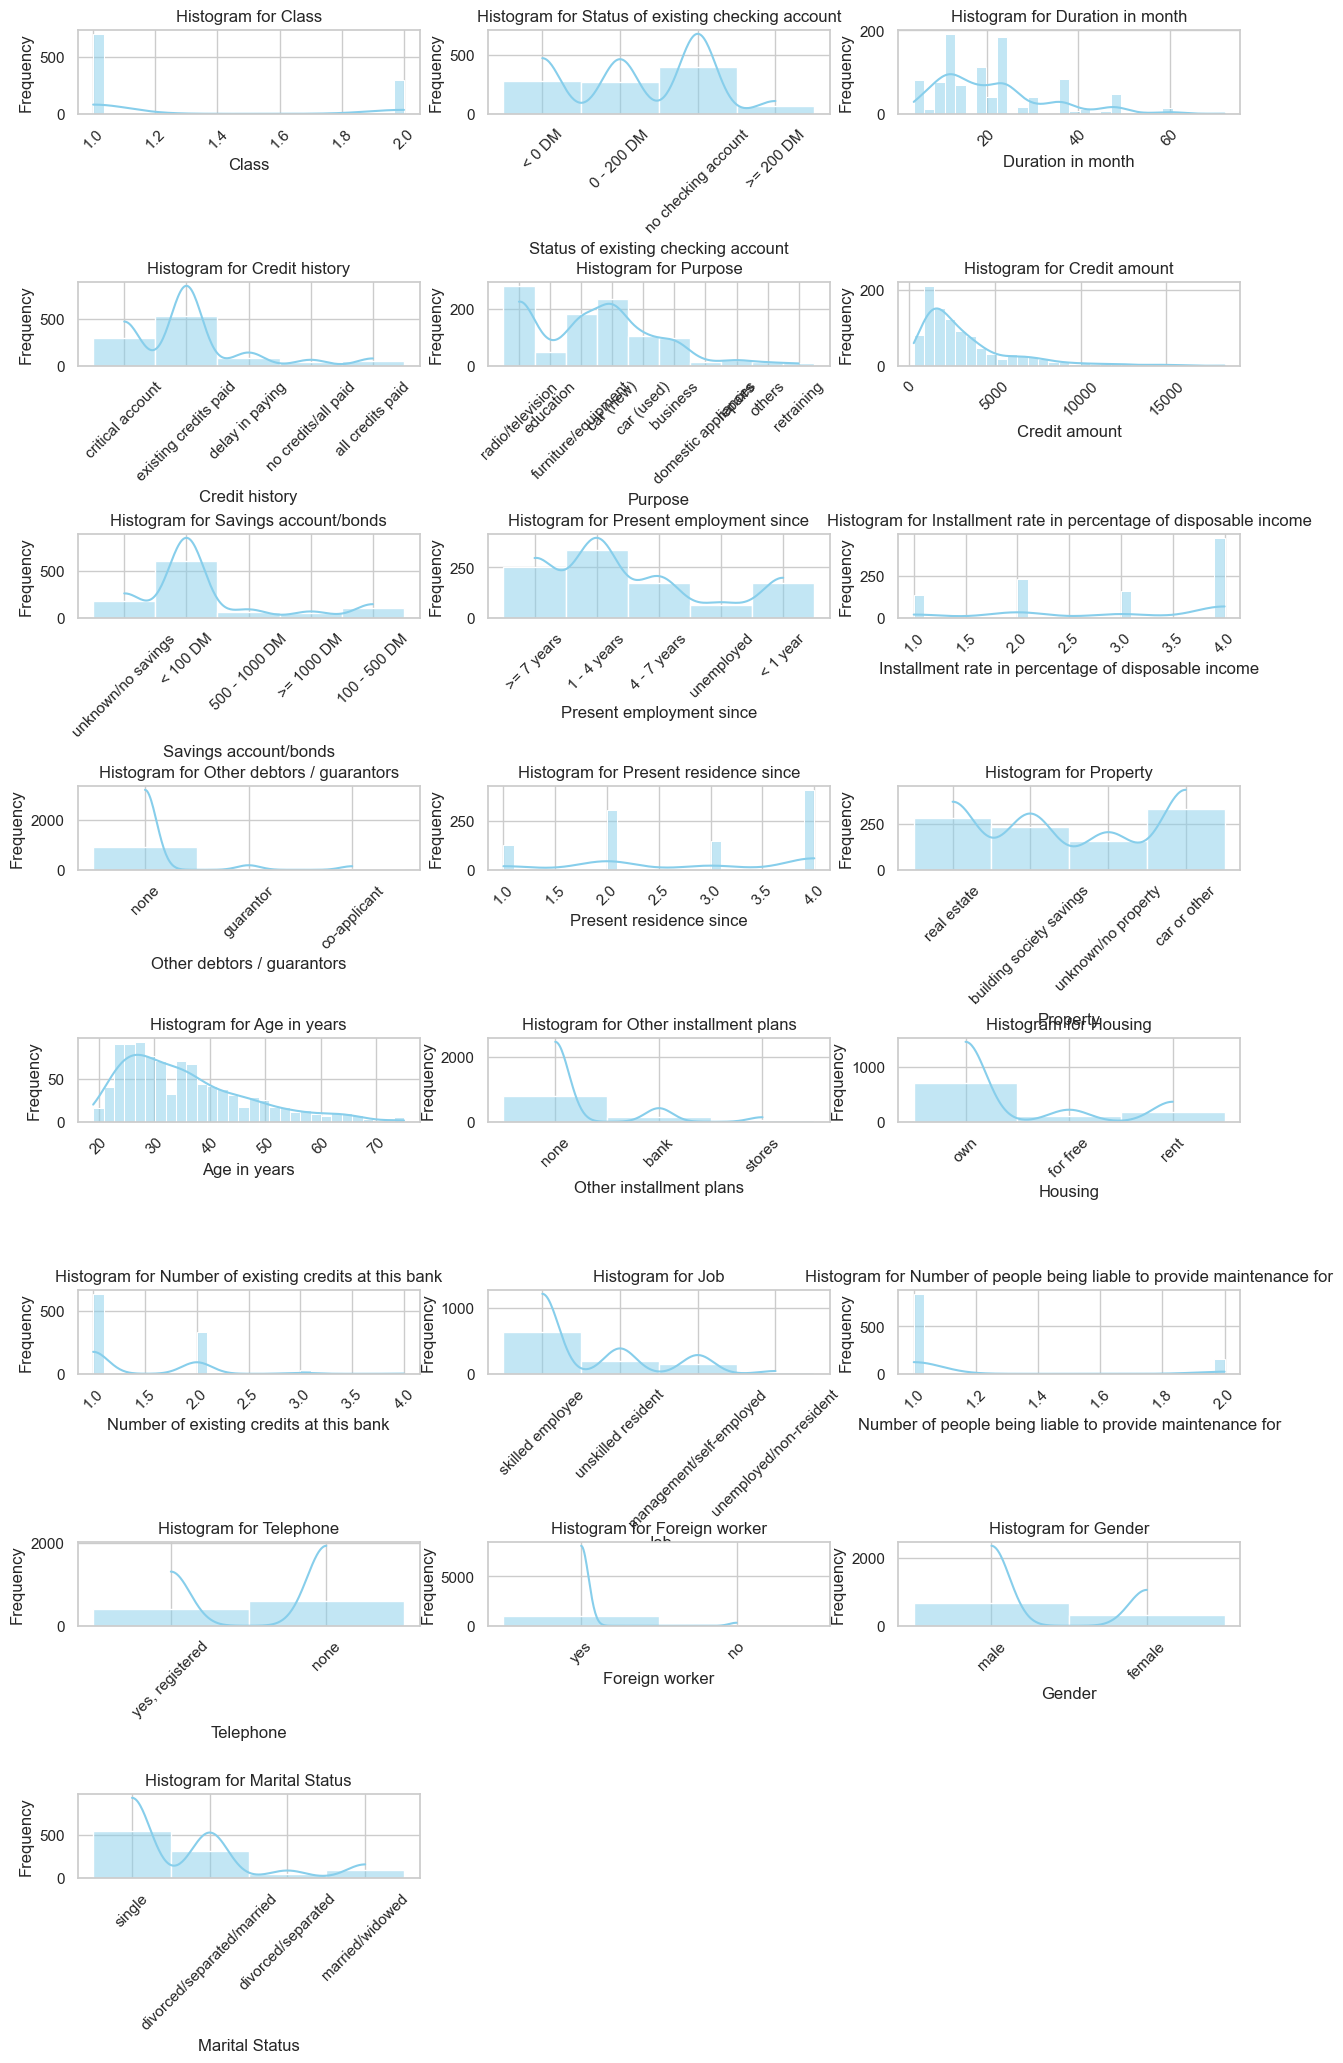

In [8]:
plots.plot_histogram(data)

A groso modo parece que no hay datos anómalos en los valores y los datos parecen estar dentro de los rangos considerados normales, es momento de mirar el sesgo de los datos.

In [9]:
# write to csv
data.to_csv("../data/Statlog_preprocesado.csv", index=False)